In [2]:
import pandas as pd

df = pd.read_csv('qrv.csv', encoding="ISO-8859-1")

# Display the DataFrame
print(df.columns)

df


Index(['Level', 'Key', 'System', 'Subsystem', 'Part Number', 'Part Title',
       'Parent', 'Responsible Engineer', 'Procurement Code',
       'Sub Component Code', 'Variant'],
      dtype='object')


,Level,Key,System,Subsystem,Part Number,Part Title,Parent,Responsible Engineer,Procurement Code,Sub Component Code,Variant
0,1,EV00004608,BODY,NaN,EV00004608,QR Vehicle,NaN,Rachel Green,Phantom,NaN,QRV: Car Type{Venti}
1,2,EV00004608-SY00002272,BODY,NaN,SY00002272,BODY,EV00004608,Rachel Green,Phantom,NaN,QRV: Car Type{Venti}
2,3,EV00004608-SY00002272-SB00007686,BODY,STRUCTURE,SB00007686,STRUCTURE,SY00002272,Rachel Green,Phantom,NaN,QRV: Car Type{Venti}
3,4,EV00004608-SY00002272-SB00007686-GP00005889,BODY,STRUCTURE,GP00005889,SEALS,SB00007686,Rachel Green,Phantom,NaN,QRV: Car Type{Venti}
4,5,EV00004608-SY00002272-SB00007686-GP00005889-CA...,BODY,STRUCTURE,CAY00010323,BODY STORE SEALANT,GP00005889,Pheobe Buffay,Phantom,NaN,QRV: Car Type{Venti}
...,...,...,...,...,...,...,...,...,...,...,...
69380,9,EV00004608-SY00005795-SB00003830-GP00009740-SB...,BATTERY PACK,BATTERY,SC00013805,Foam 607P,PT01597040,Duke Weaselton,Buy,NaN,"QRV: Battery{LMAO 5 Module,LMAO 190 Module}"
69381,8,EV00004608-SY00005795-SB00003830-GP00009740-SB...,BATTERY PACK,BATTERY,PT01759813,TOUCH COVER; NEGATIVE - LARGE,PT01759805,Swagman,Make,NaN,"QRV: Battery{LMAO 5 Module,LMAO 190 Module}"
69382,8,EV00004608-SY00005795-SB00003830-GP00009740-SB...,BATTERY PACK,BATTERY,PT01759815,TOUCH COVER; POSITIVE - LARGE,PT01759805,Swagman,Buy,NaN,"QRV: Battery{LMAO 5 Module,LMAO 190 Module}"
69383,8,EV00004608-SY00005795-SB00003830-GP00009740-SB...,BATTERY PACK,BATTERY,PT00052426,SHEAR WALL; 3BOLT,PT01759805,Judy Hopps,Buy,NaN,"QRV: Battery{LMAO 5 Module,LMAO 190 Module}"


In [4]:

# if the parent procurement code is "Buy"
# and if the parent sub component code is "blank"

# then the current must be 
# buy-consignment buy or
# buy-Directed Buy 
# buy-supplier buy 
# phantom

filtered_rows = []
count = 0
for _, row in df.iterrows():
    part_number = row['Part Number']
    parent_part = row['Parent']
    
    # Check if the parent part has a "Procurement Code" of "Buy" and "Subcomponent Code" is NaN
    parent_row = df[df['Part Number'] == parent_part]
    
    if count % 1000 == 0:
        print(count)

    if not parent_row.empty:
        parent_procurement_code = parent_row.iloc[0]['Procurement Code']
        parent_subcomponent_code = parent_row.iloc[0]['Sub Component Code']
        
        if parent_procurement_code == 'Buy' and pd.isna(parent_subcomponent_code):
            filtered_rows.append(row)
    
    count = count + 1

# Create a new DataFrame from the filtered rows
filtered_df = pd.DataFrame(filtered_rows, columns=df.columns)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000


In [5]:
filtered_df

,Level,Key,System,Subsystem,Part Number,Part Title,Parent,Responsible Engineer,Procurement Code,Sub Component Code,Variant
239,8,EV00004608-SY00002272-SB00007686-GP00005889-CA...,BODY,STRUCTURE,SC00012818,Adhesive Paste Type G,PT00021866,Ross Geller,Buy,NaN,QRV: Car Type{Venti}
240,8,EV00004608-SY00002272-SB00007686-GP00005889-CA...,BODY,STRUCTURE,SC00012818,Adhesive Paste Type G,PT00021866,Ross Geller,Buy,NaN,QRV: Car Type{Venti}
241,8,EV00004608-SY00002272-SB00007686-GP00005889-CA...,BODY,STRUCTURE,SC00012818,Adhesive Paste Type G,PT00021866,Ross Geller,Buy,NaN,QRV: Car Type{Venti}
242,8,EV00004608-SY00002272-SB00007686-GP00005889-CA...,BODY,STRUCTURE,SC00012818,Adhesive Paste Type G,PT00021866,Ross Geller,Buy,NaN,QRV: Car Type{Venti}
243,8,EV00004608-SY00002272-SB00007686-GP00005889-CA...,BODY,STRUCTURE,SC00012818,Adhesive Paste Type G,PT00021866,Ross Geller,Buy,NaN,QRV: Car Type{Venti}
...,...,...,...,...,...,...,...,...,...,...,...
69359,9,EV00004608-SY00005795-SB00003830-GP00009740-SB...,BATTERY PACK,BATTERY,PT00067251,Microwave,PT00056245,Jack Horner,Buy,DirectedBuy,"QRV: Battery{LMAO 5 Module,LMAO 190 Module}"
69360,9,EV00004608-SY00005795-SB00003830-GP00009740-SB...,BATTERY PACK,BATTERY,PT00067251,Microwave,PT00056245,Jack Horner,Buy,DirectedBuy,"QRV: Battery{LMAO 5 Module,LMAO 190 Module}"
69361,9,EV00004608-SY00005795-SB00003830-GP00009740-SB...,BATTERY PACK,BATTERY,PT00067251,Microwave,PT00056245,Jack Horner,Buy,DirectedBuy,"QRV: Battery{LMAO 5 Module,LMAO 190 Module}"
69362,9,EV00004608-SY00005795-SB00003830-GP00009740-SB...,BATTERY PACK,BATTERY,PT00067251,Microwave,PT00056245,Jack Horner,Buy,DirectedBuy,"QRV: Battery{LMAO 5 Module,LMAO 190 Module}"


In [6]:
wrong_rows = []

for _, row in filtered_df.iterrows():
    procurement_code = row['Procurement Code']
    subcomponent_code = row['Sub Component Code']
    
    if procurement_code == 'Buy' and pd.isna(subcomponent_code):
        wrong_rows.append(row)
    elif not procurement_code == 'Phantom' and not procurement_code == 'Buy':
        wrong_rows.append(row)
    
wrong_rows_df = pd.DataFrame(wrong_rows, columns=df.columns)

wrong_rows_df

,Level,Key,System,Subsystem,Part Number,Part Title,Parent,Responsible Engineer,Procurement Code,Sub Component Code,Variant
239,8,EV00004608-SY00002272-SB00007686-GP00005889-CA...,BODY,STRUCTURE,SC00012818,Adhesive Paste Type G,PT00021866,Ross Geller,Buy,NaN,QRV: Car Type{Venti}
240,8,EV00004608-SY00002272-SB00007686-GP00005889-CA...,BODY,STRUCTURE,SC00012818,Adhesive Paste Type G,PT00021866,Ross Geller,Buy,NaN,QRV: Car Type{Venti}
241,8,EV00004608-SY00002272-SB00007686-GP00005889-CA...,BODY,STRUCTURE,SC00012818,Adhesive Paste Type G,PT00021866,Ross Geller,Buy,NaN,QRV: Car Type{Venti}
242,8,EV00004608-SY00002272-SB00007686-GP00005889-CA...,BODY,STRUCTURE,SC00012818,Adhesive Paste Type G,PT00021866,Ross Geller,Buy,NaN,QRV: Car Type{Venti}
243,8,EV00004608-SY00002272-SB00007686-GP00005889-CA...,BODY,STRUCTURE,SC00012818,Adhesive Paste Type G,PT00021866,Ross Geller,Buy,NaN,QRV: Car Type{Venti}
...,...,...,...,...,...,...,...,...,...,...,...
68827,11,EV00004608-SY00005795-SB00003830-GP00009740-SB...,BATTERY PACK,BATTERY,SC00010830,Adhesive Type K32,PT01597036,Duke Weaselton,Buy,NaN,"QRV: Battery{LMAO 5 Module,LMAO 190 Module}"
69307,11,EV00004608-SY00005795-SB00003830-GP00009740-SB...,BATTERY PACK,BATTERY,SC00010830,Adhesive Type K32,PT01597036,Duke Weaselton,Buy,NaN,"QRV: Battery{LMAO 5 Module,LMAO 190 Module}"
69308,11,EV00004608-SY00005795-SB00003830-GP00009740-SB...,BATTERY PACK,BATTERY,SC00010830,Adhesive Type K32,PT01597036,Duke Weaselton,Buy,NaN,"QRV: Battery{LMAO 5 Module,LMAO 190 Module}"
69354,9,EV00004608-SY00005795-SB00003830-GP00009740-SB...,BATTERY PACK,BATTERY,PT00089670,LABEL - PRODUCT MARKING; PRINT ON DEMAND; 0.62...,PT00022780,Mercedes Jones,Buy,NaN,"QRV: Battery{LMAO 5 Module,LMAO 190 Module}"


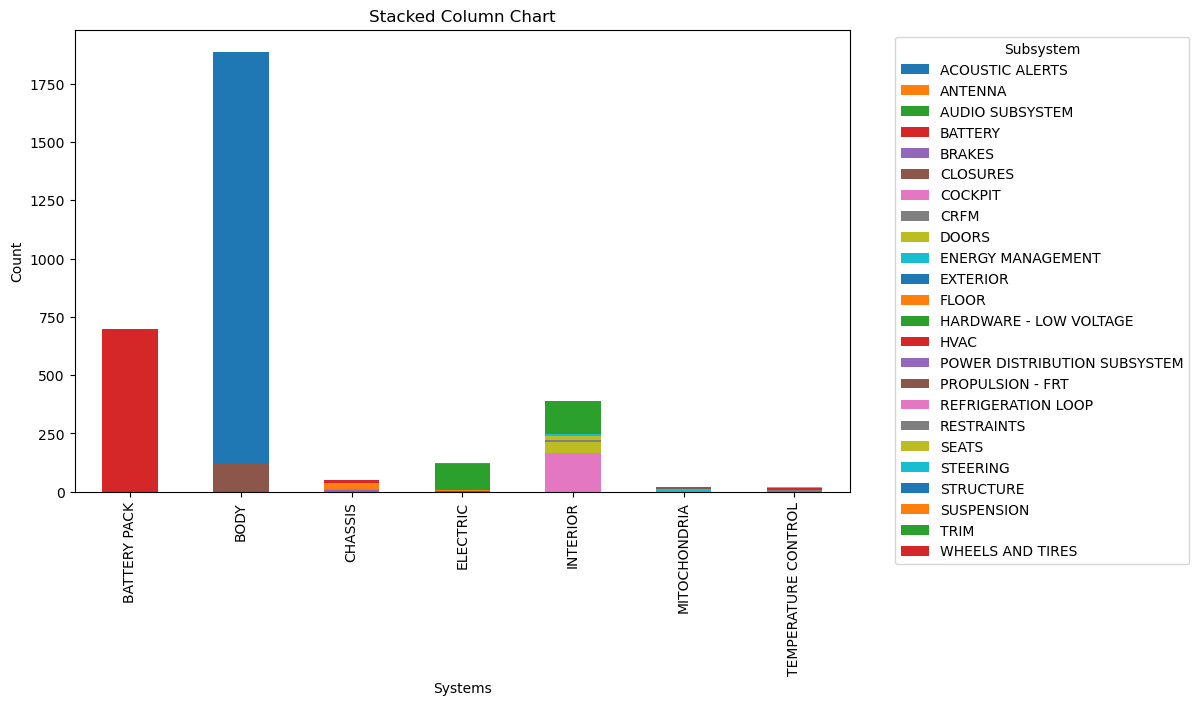

In [7]:
import pandas as pd
import matplotlib.pyplot as plt


# Group by 'systems' and 'subsystem' and count
grouped = wrong_rows_df.groupby(['System', 'Subsystem']).size().unstack(fill_value=0)

# Plot stacked bar chart
grouped.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.xlabel('Systems')
plt.ylabel('Count')
plt.title('Stacked Column Chart')
plt.legend(title='Subsystem', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()



STRUCTURE                       1412
BATTERY                          696
EXTERIOR                         354
COCKPIT                          168
TRIM                             141
CLOSURES                         121
HARDWARE - LOW VOLTAGE           109
DOORS                             44
SUSPENSION                        24
SEATS                             20
WHEELS AND TIRES                  12
ENERGY MANAGEMENT                 12
STEERING                          10
BRAKES                             9
HVAC                               8
PROPULSION - FRT                   8
RESTRAINTS                         7
CRFM                               6
ANTENNA                            6
REFRIGERATION LOOP                 5
AUDIO SUBSYSTEM                    4
FLOOR                              2
ACOUSTIC ALERTS                    2
POWER DISTRIBUTION SUBSYSTEM       1
Name: Subsystem, dtype: int64


In [8]:
right_rows = []

for _, row in filtered_df.iterrows():
    procurement_code = row['Procurement Code']
    subcomponent_code = row['Sub Component Code']
    
    if procurement_code == 'Buy' and not pd.isna(subcomponent_code):
        right_rows.append(row)
    elif procurement_code == 'Phantom':
        right_rows.append(row)
    
right_rows_df = pd.DataFrame(right_rows, columns=df.columns)

right_rows_df

,Level,Key,System,Subsystem,Part Number,Part Title,Parent,Responsible Engineer,Procurement Code,Sub Component Code,Variant
2711,7,EV00004608-SY00002272-SB00007686-GP00010894-CA...,BODY,STRUCTURE,PT00012368,FRONT BUMPER BEAM,PT00018087,Pheobe Buffay,Buy,DirectedBuy,QRV: Car Type{Grande}
2712,7,EV00004608-SY00002272-SB00007686-GP00010894-CA...,BODY,STRUCTURE,PT00053560,PLATE - FRONT BUMPER QRV,PT00018087,Pheobe Buffay,Buy,SupplierBuy,
2714,7,EV00004608-SY00002272-SB00007686-GP00010894-CA...,BODY,STRUCTURE,PT00075766,CRUSH_CAN_ASSY ;,PT00018087,Pheobe Buffay,Buy,SupplierBuy,
2733,7,EV00004608-SY00002272-SB00007686-GP00010894-CA...,BODY,STRUCTURE,PT00053551,PLATE - BUMPER MNTG ; RH ; QRV,PT00018087,Pheobe Buffay,Buy,SupplierBuy,
2736,7,EV00004608-SY00002272-SB00007686-GP00010894-CA...,BODY,STRUCTURE,PT00074275,REINF - TOW HOOK ; QRV,PT00018087,Pheobe Buffay,Buy,SupplierBuy,
...,...,...,...,...,...,...,...,...,...,...,...
69358,9,EV00004608-SY00005795-SB00003830-GP00009740-SB...,BATTERY PACK,BATTERY,PT00067250,WIRES; THERMISTOR HARNESS,PT00056245,Will Schuester,Buy,DirectedBuy,"QRV: Battery{LMAO 5 Module,LMAO 190 Module}"
69359,9,EV00004608-SY00005795-SB00003830-GP00009740-SB...,BATTERY PACK,BATTERY,PT00067251,Microwave,PT00056245,Jack Horner,Buy,DirectedBuy,"QRV: Battery{LMAO 5 Module,LMAO 190 Module}"
69360,9,EV00004608-SY00005795-SB00003830-GP00009740-SB...,BATTERY PACK,BATTERY,PT00067251,Microwave,PT00056245,Jack Horner,Buy,DirectedBuy,"QRV: Battery{LMAO 5 Module,LMAO 190 Module}"
69361,9,EV00004608-SY00005795-SB00003830-GP00009740-SB...,BATTERY PACK,BATTERY,PT00067251,Microwave,PT00056245,Jack Horner,Buy,DirectedBuy,"QRV: Battery{LMAO 5 Module,LMAO 190 Module}"


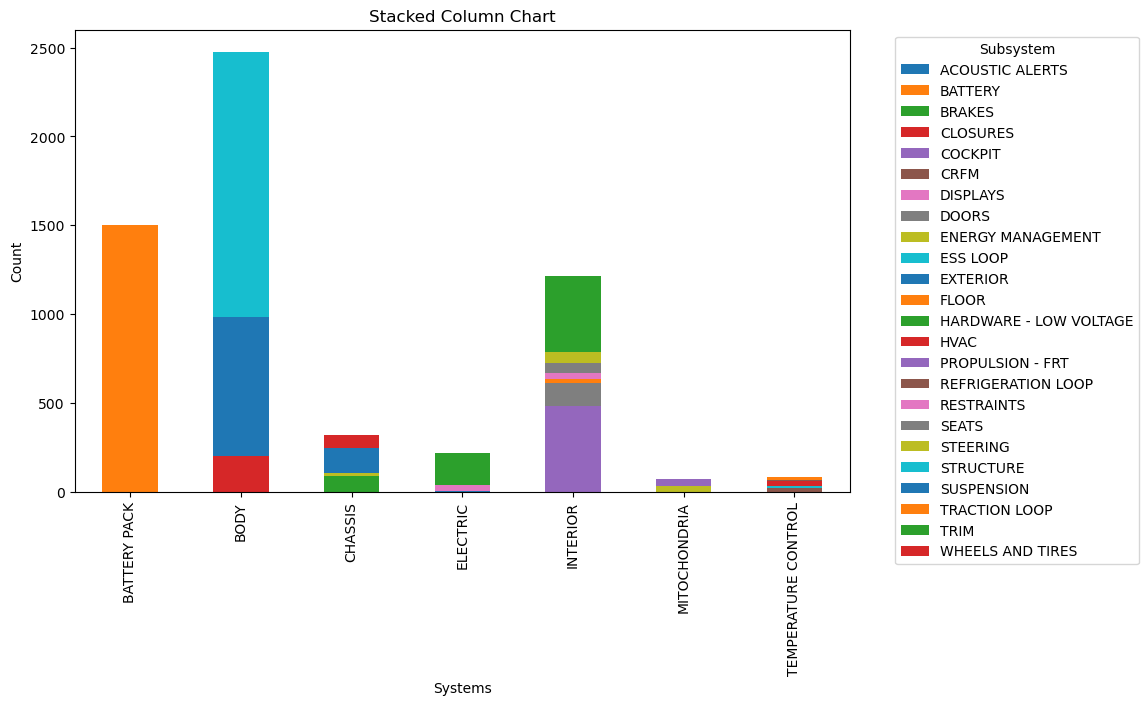

In [9]:
import pandas as pd
import matplotlib.pyplot as plt


# Group by 'systems' and 'subsystem' and count
grouped = right_rows_df.groupby(['System', 'Subsystem']).size().unstack(fill_value=0)

# Plot stacked bar chart
grouped.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.xlabel('Systems')
plt.ylabel('Count')
plt.title('Stacked Column Chart')
plt.legend(title='Subsystem', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()



In [83]:


# of the 3299 rows that fit this category, 2450 are correct


# sort by level, insert into tree, 


# find if some rows don't have existing parents


import pandas as pd

# Sample DataFrame

# Print counts of unique values in 'systems' column
total = filtered_df['Subsystem'].value_counts().sort_index()

In [106]:
import pandas as pd

# Sample DataFrame

# Print counts of unique values in 'systems' column
wrong = wrong_rows_df['Subsystem'].value_counts().sort_index()

print(wrong)


ACOUSTIC ALERTS                    2
ANTENNA                            6
AUDIO SUBSYSTEM                    4
BATTERY                          696
BRAKES                             9
CLOSURES                         121
COCKPIT                          168
CRFM                               6
DOORS                             44
ENERGY MANAGEMENT                 12
EXTERIOR                         354
FLOOR                              2
HARDWARE - LOW VOLTAGE           109
HVAC                               8
POWER DISTRIBUTION SUBSYSTEM       1
PROPULSION - FRT                   8
REFRIGERATION LOOP                 5
RESTRAINTS                         7
SEATS                             20
STEERING                          10
STRUCTURE                       1412
SUSPENSION                        24
TRIM                             141
WHEELS AND TIRES                  12
Name: Subsystem, dtype: int64


In [107]:
import pandas as pd

# Sample DataFrame

# Print counts of unique values in 'systems' column
right = right_rows_df['Subsystem'].value_counts()

print(right)


BATTERY                   1503
STRUCTURE                 1494
EXTERIOR                   780
COCKPIT                    480
TRIM                       431
CLOSURES                   203
HARDWARE - LOW VOLTAGE     176
SUSPENSION                 143
DOORS                      134
BRAKES                      88
STEERING                    77
WHEELS AND TIRES            72
SEATS                       53
PROPULSION - FRT            41
RESTRAINTS                  38
DISPLAYS                    36
ENERGY MANAGEMENT           31
HVAC                        30
CRFM                        21
FLOOR                       19
TRACTION LOOP               15
ESS LOOP                     9
REFRIGERATION LOOP           6
ACOUSTIC ALERTS              4
Name: Subsystem, dtype: int64


In [108]:
import pandas as pd

# Sample DataFrame

# Print counts of unique values in 'systems' column
wrong = wrong_rows_df['Subsystem'].value_counts()

print(wrong)


STRUCTURE                       1412
BATTERY                          696
EXTERIOR                         354
COCKPIT                          168
TRIM                             141
CLOSURES                         121
HARDWARE - LOW VOLTAGE           109
DOORS                             44
SUSPENSION                        24
SEATS                             20
WHEELS AND TIRES                  12
ENERGY MANAGEMENT                 12
STEERING                          10
BRAKES                             9
HVAC                               8
PROPULSION - FRT                   8
RESTRAINTS                         7
CRFM                               6
ANTENNA                            6
REFRIGERATION LOOP                 5
AUDIO SUBSYSTEM                    4
FLOOR                              2
ACOUSTIC ALERTS                    2
POWER DISTRIBUTION SUBSYSTEM       1
Name: Subsystem, dtype: int64


In [109]:
combined_series = wrong.add(right, fill_value=0).astype(int)

division_series = right.divide(combined_series, fill_value=0)

# Replace NaN values with 0
division_series = division_series.fillna(0)

# Print the division result
print(division_series)


ACOUSTIC ALERTS                 0.666667
ANTENNA                         0.000000
AUDIO SUBSYSTEM                 0.000000
BATTERY                         0.683492
BRAKES                          0.907216
CLOSURES                        0.626543
COCKPIT                         0.740741
CRFM                            0.777778
DISPLAYS                        1.000000
DOORS                           0.752809
ENERGY MANAGEMENT               0.720930
ESS LOOP                        1.000000
EXTERIOR                        0.687831
FLOOR                           0.904762
HARDWARE - LOW VOLTAGE          0.617544
HVAC                            0.789474
POWER DISTRIBUTION SUBSYSTEM    0.000000
PROPULSION - FRT                0.836735
REFRIGERATION LOOP              0.545455
RESTRAINTS                      0.844444
SEATS                           0.726027
STEERING                        0.885057
STRUCTURE                       0.514109
SUSPENSION                      0.856287
TRACTION LOOP   

In [110]:
sorted_series = division_series.sort_values(ascending=False)

# Print the sorted Series
print(sorted_series)


DISPLAYS                        1.000000
TRACTION LOOP                   1.000000
ESS LOOP                        1.000000
BRAKES                          0.907216
FLOOR                           0.904762
STEERING                        0.885057
WHEELS AND TIRES                0.857143
SUSPENSION                      0.856287
RESTRAINTS                      0.844444
PROPULSION - FRT                0.836735
HVAC                            0.789474
CRFM                            0.777778
TRIM                            0.753497
DOORS                           0.752809
COCKPIT                         0.740741
SEATS                           0.726027
ENERGY MANAGEMENT               0.720930
EXTERIOR                        0.687831
BATTERY                         0.683492
ACOUSTIC ALERTS                 0.666667
CLOSURES                        0.626543
HARDWARE - LOW VOLTAGE          0.617544
REFRIGERATION LOOP              0.545455
STRUCTURE                       0.514109
ANTENNA         

In [111]:
# now that we have the individual subsystem health ratios
# how do we convert this into real life improvement reccomendations for the company



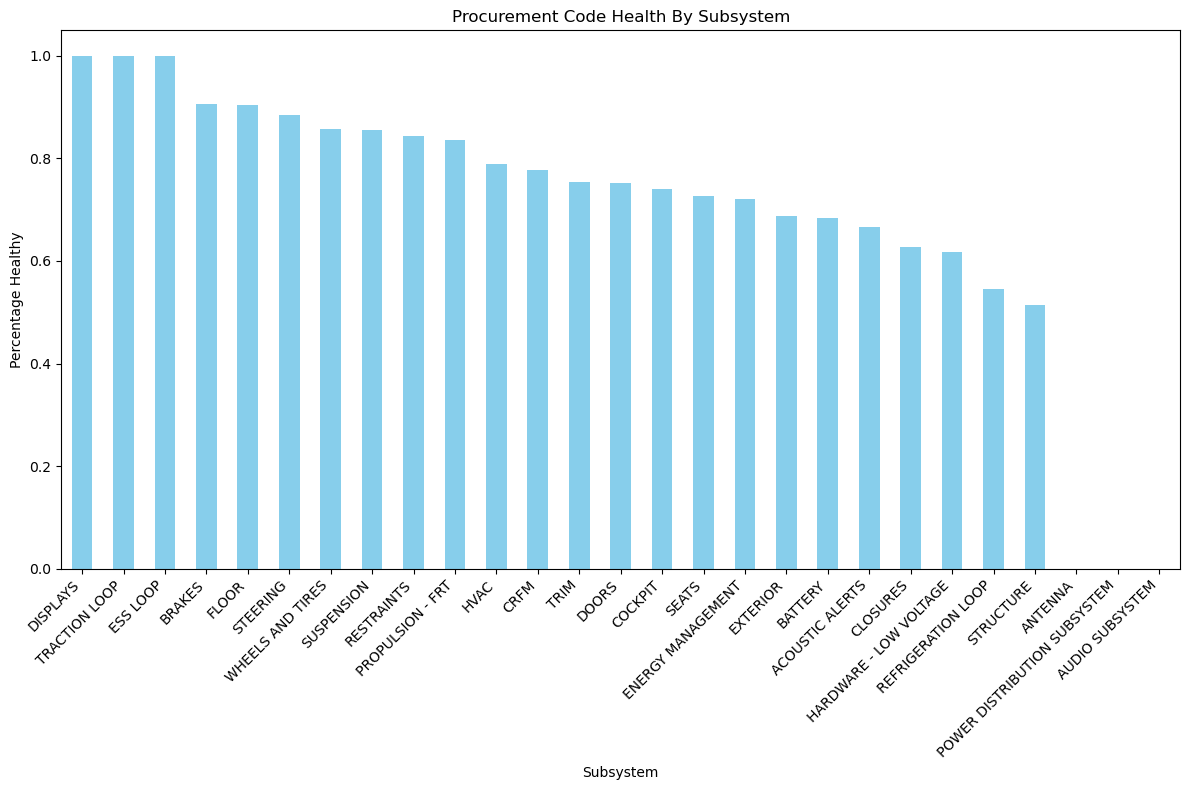

In [112]:
import matplotlib.pyplot as plt

# Sort the division result by values in descending order
sorted_series = division_series.sort_values(ascending=False)

# Create the bar plot
plt.figure(figsize=(12, 8))
sorted_series.plot(kind='bar', color='skyblue')
plt.xlabel('Subsystem')
plt.ylabel('Percentage Healthy')
plt.title('Procurement Code Health By Subsystem')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [84]:


len(wrong_rows_df)

division_series = wrong.divide(combined_series, fill_value=0)

# Replace NaN values with 0
division_series = division_series.fillna(0)

# Print the division result
print(division_series)


ACOUSTIC ALERTS                 0.333333
ANTENNA                         1.000000
AUDIO SUBSYSTEM                 1.000000
BATTERY                         0.316508
BRAKES                          0.092784
CLOSURES                        0.373457
COCKPIT                         0.259259
CRFM                            0.222222
DISPLAYS                        0.000000
DOORS                           0.247191
ENERGY MANAGEMENT               0.279070
ESS LOOP                        0.000000
EXTERIOR                        0.312169
FLOOR                           0.095238
HARDWARE - LOW VOLTAGE          0.382456
HVAC                            0.210526
POWER DISTRIBUTION SUBSYSTEM    1.000000
PROPULSION - FRT                0.163265
REFRIGERATION LOOP              0.454545
RESTRAINTS                      0.155556
SEATS                           0.273973
STEERING                        0.114943
STRUCTURE                       0.485891
SUSPENSION                      0.143713
TRACTION LOOP   

In [100]:
words_to_search = ['Tall', 'tall']
column_to_search = 'Variant'

# Create a pattern to search for multiple words
pattern = '|'.join(words_to_search)

# Count occurrences of the words in the "Description" column
count = wrong_rows_df[column_to_search].str.contains(pattern, case=False, na=False).sum()


print(count)

words_to_search = ['Grande', 'grande']
column_to_search = 'Variant'

# Create a pattern to search for multiple words
pattern = '|'.join(words_to_search)

# Count occurrences of the words in the "Description" column
count = wrong_rows_df[column_to_search].str.contains(pattern, case=False, na=False).sum()


print(count)

words_to_search = ['Venti', 'venti']
column_to_search = 'Variant'

# Create a pattern to search for multiple words
pattern = '|'.join(words_to_search)

# Count occurrences of the words in the "Description" column
count = wrong_rows_df[column_to_search].str.contains(pattern, case=False, na=False).sum()


print(count)


831
1119
1001


In [ ]:
# 831 + 146 + 203 + 232 = 1412 Tall
# 1119 + 241 + 308 + 326 = 1994 Grande
# 1001 + 159 + 235 + 258 = 1653 Venti 



In [102]:
words_to_search = ['Tall', 'tall']
column_to_search = 'Variant'

# Create a pattern to search for multiple words
pattern = '|'.join(words_to_search)

# Count occurrences of the words in the "Description" column
count = filtered_df[column_to_search].str.contains(pattern, case=False, na=False).sum()


print(count)

words_to_search = ['Grande', 'grande']
column_to_search = 'Variant'

# Create a pattern to search for multiple words
pattern = '|'.join(words_to_search)

# Count occurrences of the words in the "Description" column
count = filtered_df[column_to_search].str.contains(pattern, case=False, na=False).sum()


print(count)

words_to_search = ['Venti', 'venti']
column_to_search = 'Variant'

# Create a pattern to search for multiple words
pattern = '|'.join(words_to_search)

# Count occurrences of the words in the "Description" column
count = filtered_df[column_to_search].str.contains(pattern, case=False, na=False).sum()


print(count)


2223
3209
2632


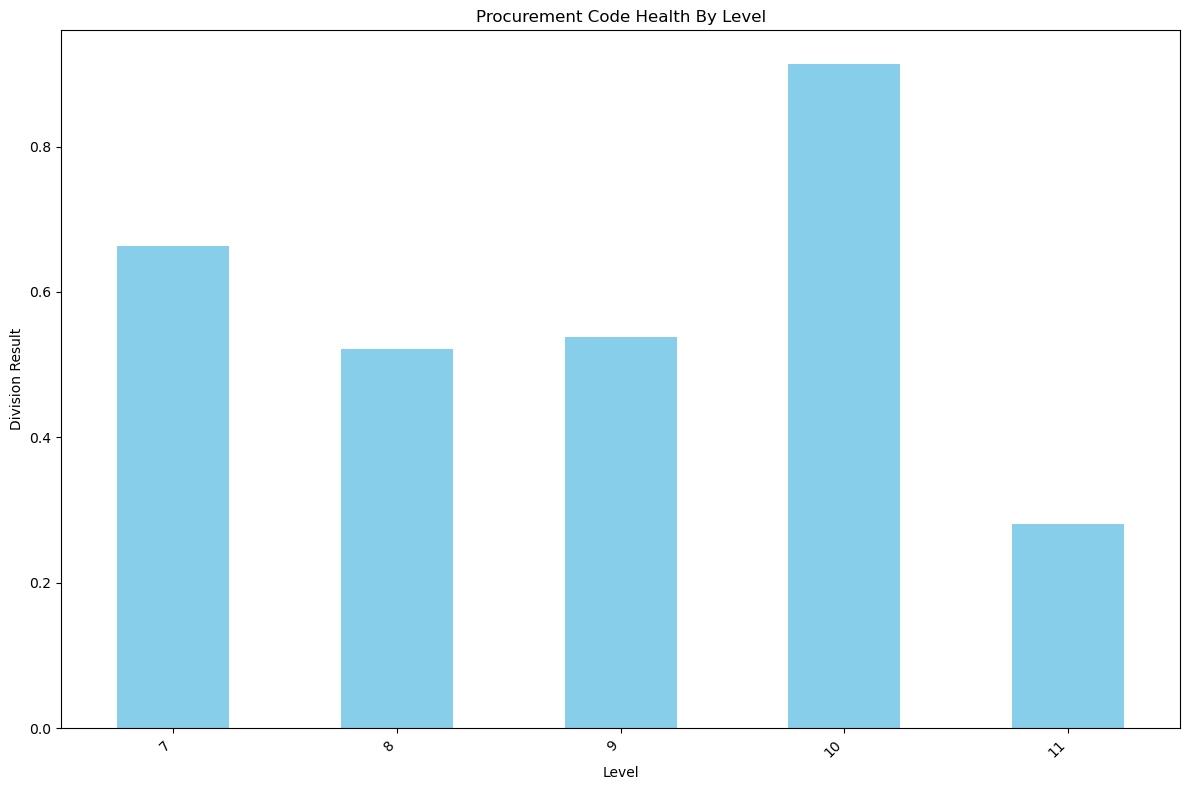

In [104]:


# of the 3299 rows that fit this category, 2450 are correct


# sort by level, insert into tree, 


# find if some rows don't have existing parents


import pandas as pd

# Sample DataFrame

# Print counts of unique values in 'systems' column
total = filtered_df['Level'].value_counts().sort_index()

import pandas as pd

# Sample DataFrame

# Print counts of unique values in 'systems' column
wrong = wrong_rows_df['Level'].value_counts().sort_index()

import pandas as pd

# Sample DataFrame

# Print counts of unique values in 'systems' column
right = right_rows_df['Level'].value_counts()

import pandas as pd

# Sample DataFrame

# Print counts of unique values in 'systems' column
wrong = wrong_rows_df['Level'].value_counts()

combined_series = wrong.add(right, fill_value=0).astype(int)

division_series = right.divide(combined_series, fill_value=0)

# Replace NaN values with 0
division_series = division_series.fillna(0)

# Print the division result

sorted_series = division_series

# Print the sorted Series

import matplotlib.pyplot as plt

# Sort the division result by values in descending order
sorted_series = division_series

# Create the bar plot
plt.figure(figsize=(12, 8))
sorted_series.plot(kind='bar', color='skyblue')
plt.xlabel('Level')
plt.ylabel('Division Result')
plt.title('Procurement Code Health By Level')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
